## Ordinary LMS

In [43]:
import pathlib
import numpy as np

path = pathlib.Path().absolute()
xdata = np.loadtxt(f"{path}/ex3Data/ex3x.dat", unpack=True).T
ydata = np.loadtxt(f"{path}/ex3Data/ex3y.dat", unpack=True)[:, np.newaxis]

print(xdata.shape, ydata.shape)

m, d = xdata.shape

(47, 2) (47, 1)


In [58]:
def add_intercept_term(X):
    m, _ = X.shape
    return np.hstack((np.ones((m, 1)), X))

def normal_scaling(X, ignore_first=True):
    mu = X.mean(axis=0)
    std = X.std(axis=0)
    X_ = X.copy()
    idx = 1 if ignore_first else 0
    X_[:, idx:] = (X[:, idx:] - mu[idx:]) / std[idx:]
    return X_

def LMS(X, y, max_iter, alpha=None):
    if alpha is None:
        alpha = [0.01, 0.03, 0.1, 0.3, 1, 1.3]
    if not isinstance(alpha, list):
        alpha = [alpha]

    res = dict()
    for i in range(len(alpha)):
        theta = np.zeros((d + 1, 1))
        J = np.zeros(max_iter)
        for num_iterations in range(max_iter):
            err = X @ theta - y
            # Calculate the J term
            J[num_iterations] = (0.5/m) * err.T @ err

            # The gradient
            grad = (1/m) * X.T @ err

            # Here is the actual update
            theta = theta - alpha[i] * grad
        res[alpha[i]] = dict(result=theta, cost=J)
    return res

In [59]:
plotstyle = ['b', 'r', 'g', 'k', 'b--', 'r--']

MAX_ITR = 100

X_ = add_intercept_term(xdata)
X = normal_scaling(X_)

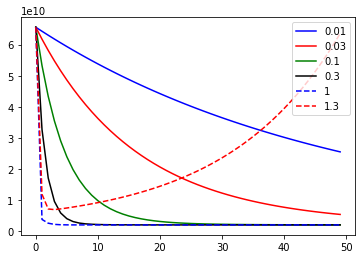

In [65]:
import matplotlib.pyplot as plt

out = LMS(X, y=ydata, max_iter=MAX_ITR)
plt.figure()
for i, val in enumerate(out.keys()):
    plt.plot(np.arange(MAX_ITR)[:50], out[val]['cost'][:50], plotstyle[i], label=val)
plt.legend(loc="upper right")
plt.show()

In [63]:
res[1]

array([[340412.65957447],
       [109447.79646964],
       [ -6578.35485416]])